In [39]:
# Import all the respective libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# read excel file which contain all the respective data of stress and stress came from UTM machine
# stress_strain_df: stress strain data frame
Stress_strain_df = pd.read_excel('stress_strain_curva.xlsx')
Stress_strain_df.describe().iloc[:,0:3]

,S.No,Strain,Stress
count,461.000000,461.000000,461.000000
mean,231.000000,0.046941,4.219143
std,133.223496,0.027078,1.401338
min,1.000000,0.000333,0.000000
25%,116.000000,0.023467,3.500000
50%,231.000000,0.047067,4.725000
75%,346.000000,0.070333,5.337500
max,461.000000,0.093467,5.787500


In [41]:
# Selecting the data without including NULL values
Stress_strain_df = Stress_strain_df.iloc[:,1:3]
Stress_strain_df.head(5)

,Strain,Stress
0,0.000333,0.00
1,0.000333,0.00
2,0.000667,0.15
3,0.000667,0.15
4,0.001000,0.15


In [42]:
# How much strength of data is present into the dataframe
max_limit = len(Stress_strain_df['Strain'])
print(f"Strength of Data: {max_limit}")

# Creating a two empty list for developing a model out of it
a,b=[],[] # a: Slope and b: Relative slope of two consecutive points

# EX: np.arange(1,5,1) which means that [1,2,3,4,5]
q=np.arange(1,max_limit,1)
for i in range(len(q)):
    x=Stress_strain_df[['Strain']][:q[i]]
    y=Stress_strain_df[['Stress']][:q[i]]
    # Evaluate the output from the model for each iterations
    from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    lr_model.fit(x,y)
    a.append(lr_model.coef_)
    if len(a)!=0:
        b.append(a[i]-a[i-1])
    y_pred = []
    for j in x.values.tolist():
        y_pred.append(lr_model.predict([j])[0][0])

Strength of Data: 461


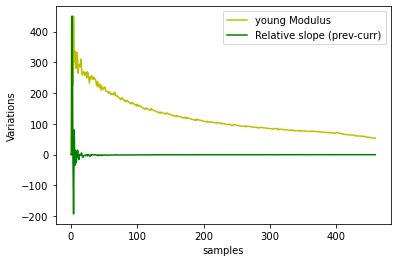

In [43]:
# creating a list for stess and strain curve
stress = y.values.tolist()
strain = x.values.tolist()
# empty list creation for calculating consecutive diff of two neaarest points
strain_diff, stress_diff, young_modulus = [], [], []
# for starting
strain_diff.append(strain[0][0])
stress_diff.append(stress[0][0])
for i in range(len(stress)):
    stress_diff.append(stress[i][0]-stress[0][0])
    strain_diff.append(strain[i][0]-strain[0][0])
    if strain_diff[i]!=0.0:
        young_modulus.append(stress_diff[i]/strain_diff[i])

young_modulus.append(young_modulus[-1])
young_modulus.append(young_modulus[-1])

c=[]
for i in range(len(b)):
    c.append(b[i][0][0])

plt.plot(np.arange(0,len(young_modulus)),young_modulus,'y', label = 'young Modulus')
plt.plot(np.arange(0,len(young_modulus)),c,'g', label = 'Relative slope (prev-curr)')
plt.legend()
plt.xlabel('samples')
plt.ylabel('Variations')
plt.savefig('young_modulus.png')

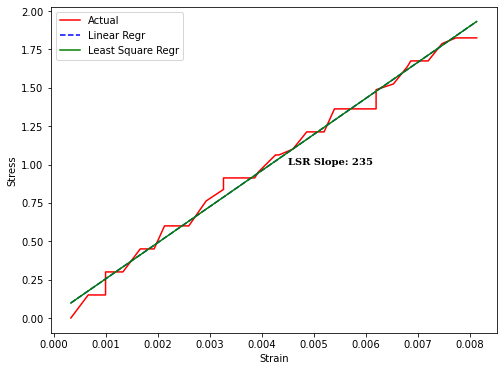

In [44]:
# Range of the data in elastic region
x=Stress_strain_df[['Strain']][:40]
y=Stress_strain_df[['Stress']][:40]
# Finding the slope of the curve by linear regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x,y)

y_pred = []
for i in x.values.tolist():
    y_pred.append(lr_model.predict([i])[0][0])

# By Least Square Regression 
SSxx = np.square(x.values).sum() - (np.sum(x.values)*np.sum(x.values))/len(x.values)
SSxy = np.multiply(x.values,y.values).sum() - (np.sum(x.values))*(np.sum(y.values))/len(x.values)
y_mean = np.average(y.values)
x_mean = np.average(x.values)
beta_1 = SSxy/SSxx
beta_0 = y_mean - beta_1*x_mean
y_LSR = beta_1*(x) + beta_0

# Plotting
plt.figure(figsize=(8,6))
plt.plot(x,y,'r',label = 'Actual');
plt.plot(x,y_pred,'--b',label = 'Linear Regr');
plt.plot(x,y_LSR,'g',label = 'Least Square Regr');
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.legend()
plt.text(0.0045,1,f'LSR Slope: {int(beta_1)}',fontfamily='serif',fontweight = 'bold',fontsize = 'medium')
plt.savefig('1.png')

- Here we saw that the slope getting from leaset square regression is the same as Linear regression 